In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [157]:
springing_angle = np.radians(23.9523)

In [158]:
def load_csv_file_pandas(filename):
    df = pd.read_csv(filename, index_col=False)
    return df

Realisations of unit weight

In [159]:
unit_weight_realisations_vector_file_name = 'masonry_unit_weight_realisations.csv'

In [160]:
masonry_unit_weight_df = load_csv_file_pandas(unit_weight_realisations_vector_file_name)

In [161]:
masonry_unit_weight_df

,masonry_unit_weight_realisations
0,12.920002
1,12.963328
2,12.970954
3,13.165483
4,13.361498
...,...
99995,30.360103
99996,30.488434
99997,30.494073
99998,30.929315


In [162]:
deterministic_reactions_file_name = 'panici_bridge_deterministic_reactions.csv'

In [163]:
deterministic_reactions_df = load_csv_file_pandas(deterministic_reactions_file_name)

In [164]:
deterministic_reactions_df

,load,reaction_x,reaction_z
0,parapet,9.5,12.3
1,arch_self_weight,13.2,17.1
2,spandrel_wall,7.1,13.9
3,backfill,30.5,59.8


In [165]:
masonry_unit_weight = 22

In [166]:
def divide_and_add(df1, constant_value, Column2, Column3, Column2_divided, Column3_divided):
    # Divide the second and third columns of df1 by constant_value
    df1[Column2_divided] = df1[Column2] / constant_value
    df1[Column3_divided] = df1[Column3] / constant_value

    return df1

constant_value = masonry_unit_weight
df1 = deterministic_reactions_df

df1_modified = divide_and_add(df1, constant_value, 'reaction_x', 'reaction_z', 'reaction_x_unit_weight', 'reaction_z_unit_weight')
print(df1_modified)

               load  reaction_x  reaction_z  reaction_x_unit_weight  \
0           parapet         9.5        12.3                0.431818   
1  arch_self_weight        13.2        17.1                0.600000   
2     spandrel_wall         7.1        13.9                0.322727   
3          backfill        30.5        59.8                1.386364   

   reaction_z_unit_weight  
0                0.559091  
1                0.777273  
2                0.631818  
3                2.718182  


In [167]:
df1_column_three = 'reaction_x_unit_weight'
df1_column_four = 'reaction_z_unit_weight'

In [168]:
df2 = masonry_unit_weight_df

In [169]:
df2_column_one = 'masonry_unit_weight_realisations'

In [170]:
df3 = pd.DataFrame()

In [171]:
for index, row in df1_modified.iloc[:3].iterrows():
    value = row[df1_column_three] 
    multiplied_values = value * df2[df2_column_one]
    df3[f'Multiplied_Column_{index}'] = multiplied_values
df3

,Multiplied_Column_0,Multiplied_Column_1,Multiplied_Column_2
0,5.579092,7.752001,4.169637
1,5.597801,7.777997,4.183619
2,5.601094,7.782572,4.186081
3,5.685095,7.899290,4.248861
4,5.769738,8.016899,4.312120
...,...,...,...
99995,13.110045,18.216062,9.798033
99996,13.165460,18.293060,9.839449
99997,13.167895,18.296444,9.841269
99998,13.355841,18.557589,9.981733


In [172]:
df4 = pd.DataFrame()

In [173]:
for index, row in df1_modified.iloc[:3].iterrows():
    value = row[df1_column_four] 
    multiplied_values = value * df2[df2_column_one]
    df4[f'Multiplied_Column_{index}'] = multiplied_values
df4

,Multiplied_Column_0,Multiplied_Column_1,Multiplied_Column_2
0,7.223455,10.042365,8.163092
1,7.247679,10.076041,8.190466
2,7.251942,10.081969,8.195284
3,7.360702,10.233171,8.318192
4,7.470292,10.385528,8.442038
...,...,...,...
99995,16.974058,23.598080,19.182065
99996,17.045806,23.697828,19.263147
99997,17.048959,23.702212,19.266710
99998,17.292299,24.040513,19.541704


In [174]:
probabilistic_reactions_df = pd.concat([df3, df4], axis = 1)

In [175]:
probabilistic_reactions_df

,Multiplied_Column_0,Multiplied_Column_1,Multiplied_Column_2,Multiplied_Column_0,Multiplied_Column_1,Multiplied_Column_2
0,5.579092,7.752001,4.169637,7.223455,10.042365,8.163092
1,5.597801,7.777997,4.183619,7.247679,10.076041,8.190466
2,5.601094,7.782572,4.186081,7.251942,10.081969,8.195284
3,5.685095,7.899290,4.248861,7.360702,10.233171,8.318192
4,5.769738,8.016899,4.312120,7.470292,10.385528,8.442038
...,...,...,...,...,...,...
99995,13.110045,18.216062,9.798033,16.974058,23.598080,19.182065
99996,13.165460,18.293060,9.839449,17.045806,23.697828,19.263147
99997,13.167895,18.296444,9.841269,17.048959,23.702212,19.266710
99998,13.355841,18.557589,9.981733,17.292299,24.040513,19.541704


In [176]:
probabilistic_reactions_df.columns = ['parapet_reaction_x',
                                      'arch_self_weight_reaction_x',
                                      'spandrel_wall_reaction_x',
                                      'parapet_reaction_z',
                                      'arch_self_weight_reaction_z',
                                      'spandrel_wall_reaction_z']

In [177]:
probabilistic_reactions_df

,parapet_reaction_x,arch_self_weight_reaction_x,spandrel_wall_reaction_x,parapet_reaction_z,arch_self_weight_reaction_z,spandrel_wall_reaction_z
0,5.579092,7.752001,4.169637,7.223455,10.042365,8.163092
1,5.597801,7.777997,4.183619,7.247679,10.076041,8.190466
2,5.601094,7.782572,4.186081,7.251942,10.081969,8.195284
3,5.685095,7.899290,4.248861,7.360702,10.233171,8.318192
4,5.769738,8.016899,4.312120,7.470292,10.385528,8.442038
...,...,...,...,...,...,...
99995,13.110045,18.216062,9.798033,16.974058,23.598080,19.182065
99996,13.165460,18.293060,9.839449,17.045806,23.697828,19.263147
99997,13.167895,18.296444,9.841269,17.048959,23.702212,19.266710
99998,13.355841,18.557589,9.981733,17.292299,24.040513,19.541704


In [178]:
probabilistic_reactions_df['backfill_reaction_x'] = probabilistic_reactions_df['parapet_reaction_x']
probabilistic_reactions_df['backfill_reaction_x'] = deterministic_reactions_df['reaction_x'][3]
probabilistic_reactions_df

,parapet_reaction_x,arch_self_weight_reaction_x,spandrel_wall_reaction_x,parapet_reaction_z,arch_self_weight_reaction_z,spandrel_wall_reaction_z,backfill_reaction_x
0,5.579092,7.752001,4.169637,7.223455,10.042365,8.163092,30.5
1,5.597801,7.777997,4.183619,7.247679,10.076041,8.190466,30.5
2,5.601094,7.782572,4.186081,7.251942,10.081969,8.195284,30.5
3,5.685095,7.899290,4.248861,7.360702,10.233171,8.318192,30.5
4,5.769738,8.016899,4.312120,7.470292,10.385528,8.442038,30.5
...,...,...,...,...,...,...,...
99995,13.110045,18.216062,9.798033,16.974058,23.598080,19.182065,30.5
99996,13.165460,18.293060,9.839449,17.045806,23.697828,19.263147,30.5
99997,13.167895,18.296444,9.841269,17.048959,23.702212,19.266710,30.5
99998,13.355841,18.557589,9.981733,17.292299,24.040513,19.541704,30.5


In [179]:
last_column = probabilistic_reactions_df.columns[-1]

In [180]:
target_position = 3

In [181]:
column_to_move = probabilistic_reactions_df.pop(last_column)

In [182]:
probabilistic_reactions_df.insert(target_position, last_column, column_to_move)

In [183]:
probabilistic_reactions_df

,parapet_reaction_x,arch_self_weight_reaction_x,spandrel_wall_reaction_x,backfill_reaction_x,parapet_reaction_z,arch_self_weight_reaction_z,spandrel_wall_reaction_z
0,5.579092,7.752001,4.169637,30.5,7.223455,10.042365,8.163092
1,5.597801,7.777997,4.183619,30.5,7.247679,10.076041,8.190466
2,5.601094,7.782572,4.186081,30.5,7.251942,10.081969,8.195284
3,5.685095,7.899290,4.248861,30.5,7.360702,10.233171,8.318192
4,5.769738,8.016899,4.312120,30.5,7.470292,10.385528,8.442038
...,...,...,...,...,...,...,...
99995,13.110045,18.216062,9.798033,30.5,16.974058,23.598080,19.182065
99996,13.165460,18.293060,9.839449,30.5,17.045806,23.697828,19.263147
99997,13.167895,18.296444,9.841269,30.5,17.048959,23.702212,19.266710
99998,13.355841,18.557589,9.981733,30.5,17.292299,24.040513,19.541704


In [184]:
probabilistic_reactions_df['backfill_reaction_x'] = probabilistic_reactions_df['parapet_reaction_x']
probabilistic_reactions_df['backfill_reaction_z'] = deterministic_reactions_df['reaction_z'][3]
probabilistic_reactions_df

,parapet_reaction_x,arch_self_weight_reaction_x,spandrel_wall_reaction_x,backfill_reaction_x,parapet_reaction_z,arch_self_weight_reaction_z,spandrel_wall_reaction_z,backfill_reaction_z
0,5.579092,7.752001,4.169637,5.579092,7.223455,10.042365,8.163092,59.8
1,5.597801,7.777997,4.183619,5.597801,7.247679,10.076041,8.190466,59.8
2,5.601094,7.782572,4.186081,5.601094,7.251942,10.081969,8.195284,59.8
3,5.685095,7.899290,4.248861,5.685095,7.360702,10.233171,8.318192,59.8
4,5.769738,8.016899,4.312120,5.769738,7.470292,10.385528,8.442038,59.8
...,...,...,...,...,...,...,...,...
99995,13.110045,18.216062,9.798033,13.110045,16.974058,23.598080,19.182065,59.8
99996,13.165460,18.293060,9.839449,13.165460,17.045806,23.697828,19.263147,59.8
99997,13.167895,18.296444,9.841269,13.167895,17.048959,23.702212,19.266710,59.8
99998,13.355841,18.557589,9.981733,13.355841,17.292299,24.040513,19.541704,59.8


In [185]:
probabilistic_reaction_x = probabilistic_reactions_df.iloc[:,:4].sum(axis=1)
probabilistic_reaction_x

0        23.079821
1        23.157217
2        23.170840
3        23.518341
4        23.868495
           ...    
99995    54.234184
99996    54.463430
99997    54.473504
99998    55.251004
99999    55.825379
Length: 100000, dtype: float64

In [186]:
probabilistic_reaction_z = probabilistic_reactions_df.iloc[:,4:].sum(axis=1)
probabilistic_reaction_z

0         85.228912
1         85.314186
2         85.329195
3         85.712065
4         86.097858
            ...    
99995    119.554203
99996    119.806781
99997    119.817881
99998    120.674516
99999    121.307351
Length: 100000, dtype: float64

In [187]:
probabilistic_reaction_x[:]

0        23.079821
1        23.157217
2        23.170840
3        23.518341
4        23.868495
           ...    
99995    54.234184
99996    54.463430
99997    54.473504
99998    55.251004
99999    55.825379
Length: 100000, dtype: float64

In [188]:
demand = probabilistic_reaction_x[:] * np.sin(springing_angle) + probabilistic_reaction_z[:] * np.cos(springing_angle)
demand

0         87.259171
1         87.368522
2         87.387770
3         87.878745
4         88.373469
            ...    
99995    131.276419
99996    131.600314
99997    131.614548
99998    132.713059
99999    133.524580
Length: 100000, dtype: float64

In [189]:
type(demand)

pandas.core.series.Series

Realisations of compressive resistance

In [190]:
compressive_resistance_realisations_vector_file_name = 'masonry_compressive_realisations.csv'

In [191]:
masonry_compressive_resistance_df = load_csv_file_pandas(compressive_resistance_realisations_vector_file_name)

In [227]:
masonry_compressive_resistance_df[:]

,masonry_compressive_realisations
0,2.372290
1,2.390688
2,2.393926
3,2.476530
4,2.559764
...,...
99995,9.777952
99996,9.832445
99997,9.834840
99998,10.019659


In [192]:
b = 1

In [193]:
h = 0.50

In [194]:
e = 0.02 # it comes from the double-fixed scheme at the constrained section

In [228]:
k = 1.645

In [230]:
masonry_compressive_resistance_df_characteristic = masonry_compressive_resistance_df[:] * (k -1)

In [231]:
capacity = 0.4 * b * (masonry_compressive_resistance_df_characteristic[:]) * 1000 * (h - 2*e)

In [232]:
type(capacity)

pandas.core.frame.DataFrame

In [233]:
capacity['masonry_compressive_realisations']

0         281.543360
1         283.726802
2         284.111123
3         293.914563
4         303.792842
            ...     
99995    1160.447321
99996    1166.914617
99997    1167.198822
99998    1189.133077
99999    1205.336926
Name: masonry_compressive_realisations, Length: 100000, dtype: float64

Failure probability

Demand probability distribution

In [234]:
demand_mean = demand.mean()
demand_mean

110.16516470566052

In [235]:
demand_std = demand.std()
demand_std

5.556521113148476

In [236]:
demand_pdf = stats.norm.pdf(demand, demand_mean, demand_std)

Capacity probability distribution

In [237]:
capacity_mean = capacity['masonry_compressive_realisations'].mean()
capacity_mean

738.9133540477673

In [238]:
capacity_std = capacity['masonry_compressive_realisations'].std()
capacity_std

110.94851643193581

In [239]:
capacity_pdf = stats.norm.pdf(capacity['masonry_compressive_realisations'], capacity_mean, capacity_std)

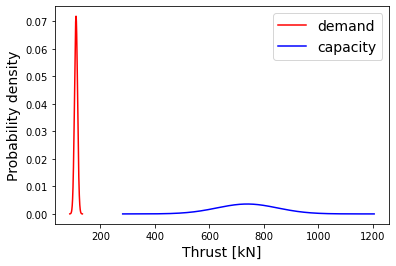

<Figure size 360x360 with 0 Axes>

In [240]:
plt.plot(demand, demand_pdf, color = 'red')
plt.plot(capacity['masonry_compressive_realisations'], capacity_pdf, color='blue')

plt.xlabel('Thrust [kN]', fontsize = 14)
plt.ylabel('Probability density', fontsize=14)
plt.legend(['demand', 'capacity'], loc = 'best', fontsize=14)
fig = plt.figure(figsize=(5, 5))
plt.show()

In [241]:
limit_state_function = capacity['masonry_compressive_realisations'] - demand

In [242]:
failure_cases = (limit_state_function < 0).sum() +(limit_state_function == 0).sum()
failure_cases

0

In [243]:
no_of_samples = len(limit_state_function)

In [244]:
failure_probability = failure_cases/no_of_samples
failure_probability

0.0